In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

/home/tin/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
def generate_circle(size):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    Z = X**2 + Y**2
    Z = Z < 0.5
    Z = Z.astype(np.float32)
    return Z

In [21]:
import scipy.signal as signal

def edge_filter_mask(image):
    # Define the Sobel filter
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Apply the filter on the image
    image_x = signal.convolve2d(image, sobel_x, mode='same', boundary='symm')
    image_y = signal.convolve2d(image, sobel_y, mode='same', boundary='symm')

    # Compute the magnitude
    magnitude = np.sqrt(np.square(image_x) + np.square(image_y))

    # Compute the outline
    outline = np.zeros_like(magnitude)
    outline[magnitude > 0] = 1

    return outline

In [3]:
def hausdorff_distance(x, y):
    # x and y are two tensors of shape (N, 2)
    # N is the number of points in the contour
    # 2 is the dimension of the contour
    # x is the contour of the predicted mask
    # y is the contour of the ground truth mask
    # return the hausdorff distance between x and y
    return max(torch.max(torch.min(torch.sum((x-y)**2, dim=1), dim=0)[0]), torch.max(torch.min(torch.sum((y-x)**2, dim=1), dim=0)[0]))

In [ ]:
def dice_score(pred, target):
    smooth = 1.
    iflat = pred.view(-1)
    tflat = target.view(-1)
    intersection = (iflat * tflat).sum()
    return (2. * intersection + smooth) / (iflat.sum() + tflat.sum() + smooth)

In [22]:
# TESTING STUFF

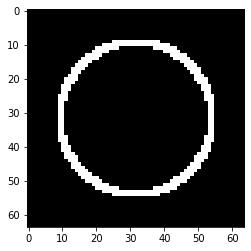

In [24]:
image = generate_circle(64) + 2
outline = edge_filter_mask(image)
plt.imshow(outline, cmap='gray')